<a href="https://colab.research.google.com/github/rajdeepbanerjee-git/JNCLectures_Intro_to_ML/blob/main/Week7/Lec7_GMM_from_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Refs:
- Geron for basic understanding
- Elements of statistical learning (Hastie-Tibshirani), chapter 8, for understanding the underlying maths
- [medium article](https://towardsdatascience.com/gaussian-mixture-model-clearly-explained-115010f7d4cf), for generalized formulae

In [7]:
import numpy as np
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt

from scipy.stats import norm
from numpy import mean
from numpy import std

In [141]:
#iris = datasets.load_iris()
#X = iris["data"][:,3]

X = np.array([-0.39, 0.12, 0.94, 1.67, 1.76, 2.44, 3.72, 4.28, 4.92, 5.53, \
               0.06, 0.48, 1.01, 1.68, 1.80, 3.25, 4.12, 4.60, 5.28, 6.22])
X_0_GT = X[np.where(X<=3.0)]
X_1_GT = X[np.where(X>3.0)]

(array([3., 1., 2., 4., 1., 1., 2., 2., 3., 1.]),
 array([-0.39 ,  0.271,  0.932,  1.593,  2.254,  2.915,  3.576,  4.237,
         4.898,  5.559,  6.22 ]),
 <BarContainer object of 10 artists>)

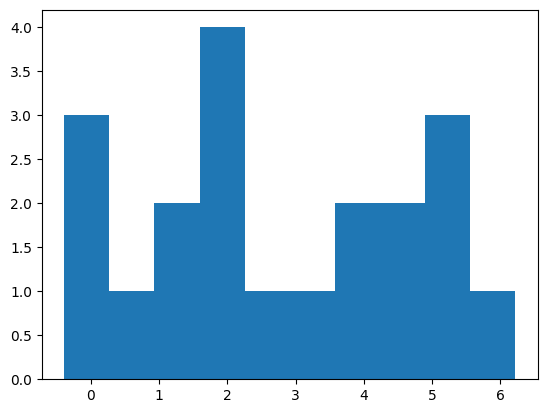

In [46]:
plt.hist(X)

In [9]:
# let's use the fit_distribution function we created in Naive Bayes lecture and split it for ease of use
# given data calculate mu and signa and given mu and sigma it calculates the distribution
# if you then want to use to to get the pdf: norm_dist_test = fit_distribution(mu, sigma); norm_dist_test.pdf(X)

def get_mean_std(data):
    return mean(data), std(data)

def fit_distribution(mu, sigma):
 # fit distribution
  dist = norm(mu, sigma)
  return dist

In [10]:
# initialize
Z = (X - mean(X))/std(X)
K = 2
# relevance_matrrix -> for each data point you have vector of size K telling you
# the probability of that data point belonging to each of the K clusters
#relevance_mat = np.array([[1/K for k in range(K)] for i in range(len(X))])



In [11]:
Z

array([-1.53845969, -1.28242626, -0.87076467, -0.50428545, -0.45910308,
       -0.11772517,  0.52486853,  0.80600327,  1.12730012,  1.43353619,
       -1.31254784, -1.10169678, -0.83562283, -0.49926519, -0.43902203,
        0.28891615,  0.72567906,  0.9666517 ,  1.3080296 ,  1.77993435])

In [85]:
# function to calculate weight, mean and std for each cluster

def get_cluster_weight_mean_std(data, relevance_mat):
  ### it will return mean and std of each cluster as  [[mean1, std1], [mean2, std2], ...]
  weight_mean_std_list = []
  for cluster in range(0, K):
    cluster_mean = data.dot(relevance_mat[:, cluster])/len(data)
    cluster_var = ((data - cluster_mean)**2).dot(relevance_mat[:, cluster]) \
                  /np.sum(relevance_mat[:, cluster])
    cluster_std = np.sqrt(cluster_var)
    cluster_weight = np.sum(relevance_mat[:, cluster])/len(data)

    weight_mean_std_list.append([cluster_weight, cluster_mean, cluster_std])

  return weight_mean_std_list

In [86]:
# given data, calculate the relevance matrix with shape (len(X), K)
def get_relevance_mat(data, wms_list):
  temp_list = []
  for cluster in range(0, K):
    cluster_dist = fit_distribution(mu = wms_list[cluster][1], sigma = wms_list[cluster][2])
    cluster_pdf_X = cluster_dist.pdf(data)
    temp = wms_list[cluster][0]*cluster_pdf_X
    temp_list.append(temp)

  rel_mat = []
  for cluster in range(0, K):
    numerator = np.array(temp_list)[cluster, :]
    denominator = np.sum(np.array(temp_list), axis = 0)
    rel_cluster = np.divide(numerator, denominator)
    rel_mat.append(rel_cluster)

  return np.array(rel_mat).T


In [87]:
def run_epochs(num_epochs, X, K, cluster_wms):

  epoch_details = []

  for epoch in range(num_epochs):
    # calculate relevance matrix
    relevance_mat = get_relevance_mat(data = X, wms_list = cluster_wms )


    # update
    cluster_wms = get_cluster_weight_mean_std(data = X, relevance_mat = relevance_mat)

    # save
    epoch_details.append({"epoch": epoch,
                          "cluster_weights": [cluster_wms[cluster][0] for cluster in range(K)],
                          "mean": [cluster_wms[cluster][1] for cluster in range(K)],
                          "std": [cluster_wms[cluster][2] for cluster in range(K)]
                          })
    print(cluster_wms)

  return epoch_details, relevance_mat

In [124]:
# initialize
K = 2
cluster_wms = np.array([[0.5, X[np.random.randint(20)], std(X)], \
                       [0.5, X[np.random.randint(20)], std(X)]])



print(cluster_wms)

epoch_details, rel_mat = run_epochs(num_epochs = 2,
                           X = X,
                           K = 2,
                           cluster_wms = cluster_wms)

[[0.5       1.01      1.9919274]
 [0.5       4.92      1.9919274]]
[[0.5474983981620711, 0.7925895599125725, 1.562864682612867], [0.4525016018379289, 1.8819104400874278, 2.737246266447541]]
[[0.44268797764210965, 0.681589059974588, 1.6606217832521293], [0.5573120223578903, 1.992910940025412, 2.4868142782644487]]


In [139]:
which_class = np.argmax(rel_mat, axis = 1)
X_0 = X[which_class == 0]
X_1 = X[which_class == 1]

In [140]:
X_0, X_1

(array([-0.39,  0.12,  0.94,  1.67,  1.76,  2.44,  0.06,  0.48,  1.01,
         1.68,  1.8 ]),
 array([3.72, 4.28, 4.92, 5.53, 3.25, 4.12, 4.6 , 5.28, 6.22]))

In [157]:
X_0_GT, X_1_GT

(array([-0.39,  0.12,  0.94,  1.67,  1.76,  2.44,  0.06,  0.48,  1.01,
         1.68,  1.8 ]),
 array([3.72, 4.28, 4.92, 5.53, 3.25, 4.12, 4.6 , 5.28, 6.22]))

In [128]:
mean1 = epoch_details[1]["mean"][0]
std1 = epoch_details[1]["std"][0]
mean2 = epoch_details[1]["mean"][1]
std2 = epoch_details[1]["std"][1]

In [154]:
final_dist_0 = fit_distribution(mu = mean1, sigma = std1).pdf(X_0)
final_dist_1 = fit_distribution(mu = mean2, sigma = std2).pdf(X_1)
#+ fit_distribution(mu = mean2, sigma = std2).pdf(X)

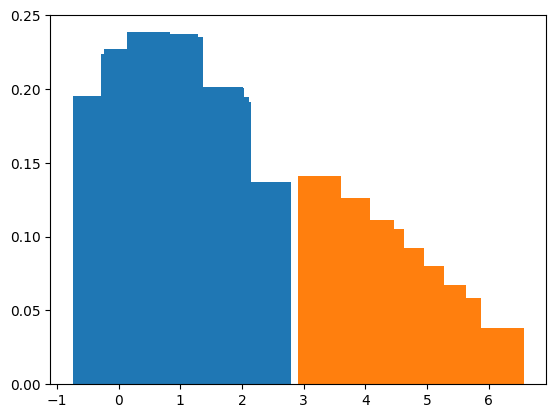

In [156]:
plt.bar(X_0, final_dist_0, width = 0.7)
plt.bar(X_1, final_dist_1, width = 0.7)
plt.show()